## Fazendo imports e lendo dataset sobre COVID no mundo

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df = pd.read_csv('covid.csv')
df.fillna(value= {'Name': 'Global'}, inplace=True)
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,Global,213050725,2733.332758,4517068,57.951692,664610,4448352,57.0701,68150,0.87433,8023,NaN
United States of America,Americas,37816239,11424.750000,1038848,313.850000,227282,625046,188.8300,7418,2.24000,1146,NaN
India,South-East Asia,32512366,2355.960000,226509,16.410000,37593,435758,31.5800,3239,0.23000,648,NaN
Brazil,Americas,20583994,9683.880000,205424,96.640000,13103,574848,270.4400,5356,2.52000,321,NaN
Russian Federation,Europe,6804910,4662.990000,141437,96.920000,19536,178423,122.2600,5514,3.78000,809,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN
Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN
Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN
Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN


In [82]:
df['Deaths - cumulative total'].mean()

66.92223671008296

In [83]:
df.isnull().sum()

Name                                                              0
WHO Region                                                        0
Cases - cumulative total                                          1
Cases - cumulative total per 100000 population                    0
Cases - newly reported in last 7 days                             1
Cases - newly reported in last 7 days per 100000 population       0
Cases - newly reported in last 24 hours                           0
Deaths - cumulative total                                         1
Deaths - cumulative total per 100000 population                   0
Deaths - newly reported in last 7 days                            1
Deaths - newly reported in last 7 days per 100000 population      0
Deaths - newly reported in last 24 hours                        238
dtype: int64

In [84]:
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,Global,213050725,2733.332758,4517068,57.951692,664610,4448352,57.0701,68150,0.87433,8023,NaN
United States of America,Americas,37816239,11424.750000,1038848,313.850000,227282,625046,188.8300,7418,2.24000,1146,NaN
India,South-East Asia,32512366,2355.960000,226509,16.410000,37593,435758,31.5800,3239,0.23000,648,NaN
Brazil,Americas,20583994,9683.880000,205424,96.640000,13103,574848,270.4400,5356,2.52000,321,NaN
Russian Federation,Europe,6804910,4662.990000,141437,96.920000,19536,178423,122.2600,5514,3.78000,809,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN
Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN
Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN
Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,NaN


## Limpando os dados e verificando hipóteses

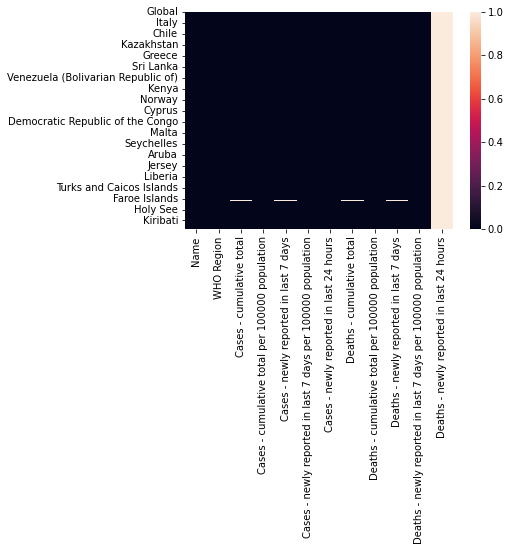

In [85]:
sns.heatmap(df.isnull());

<Figure size 1440x1440 with 0 Axes>

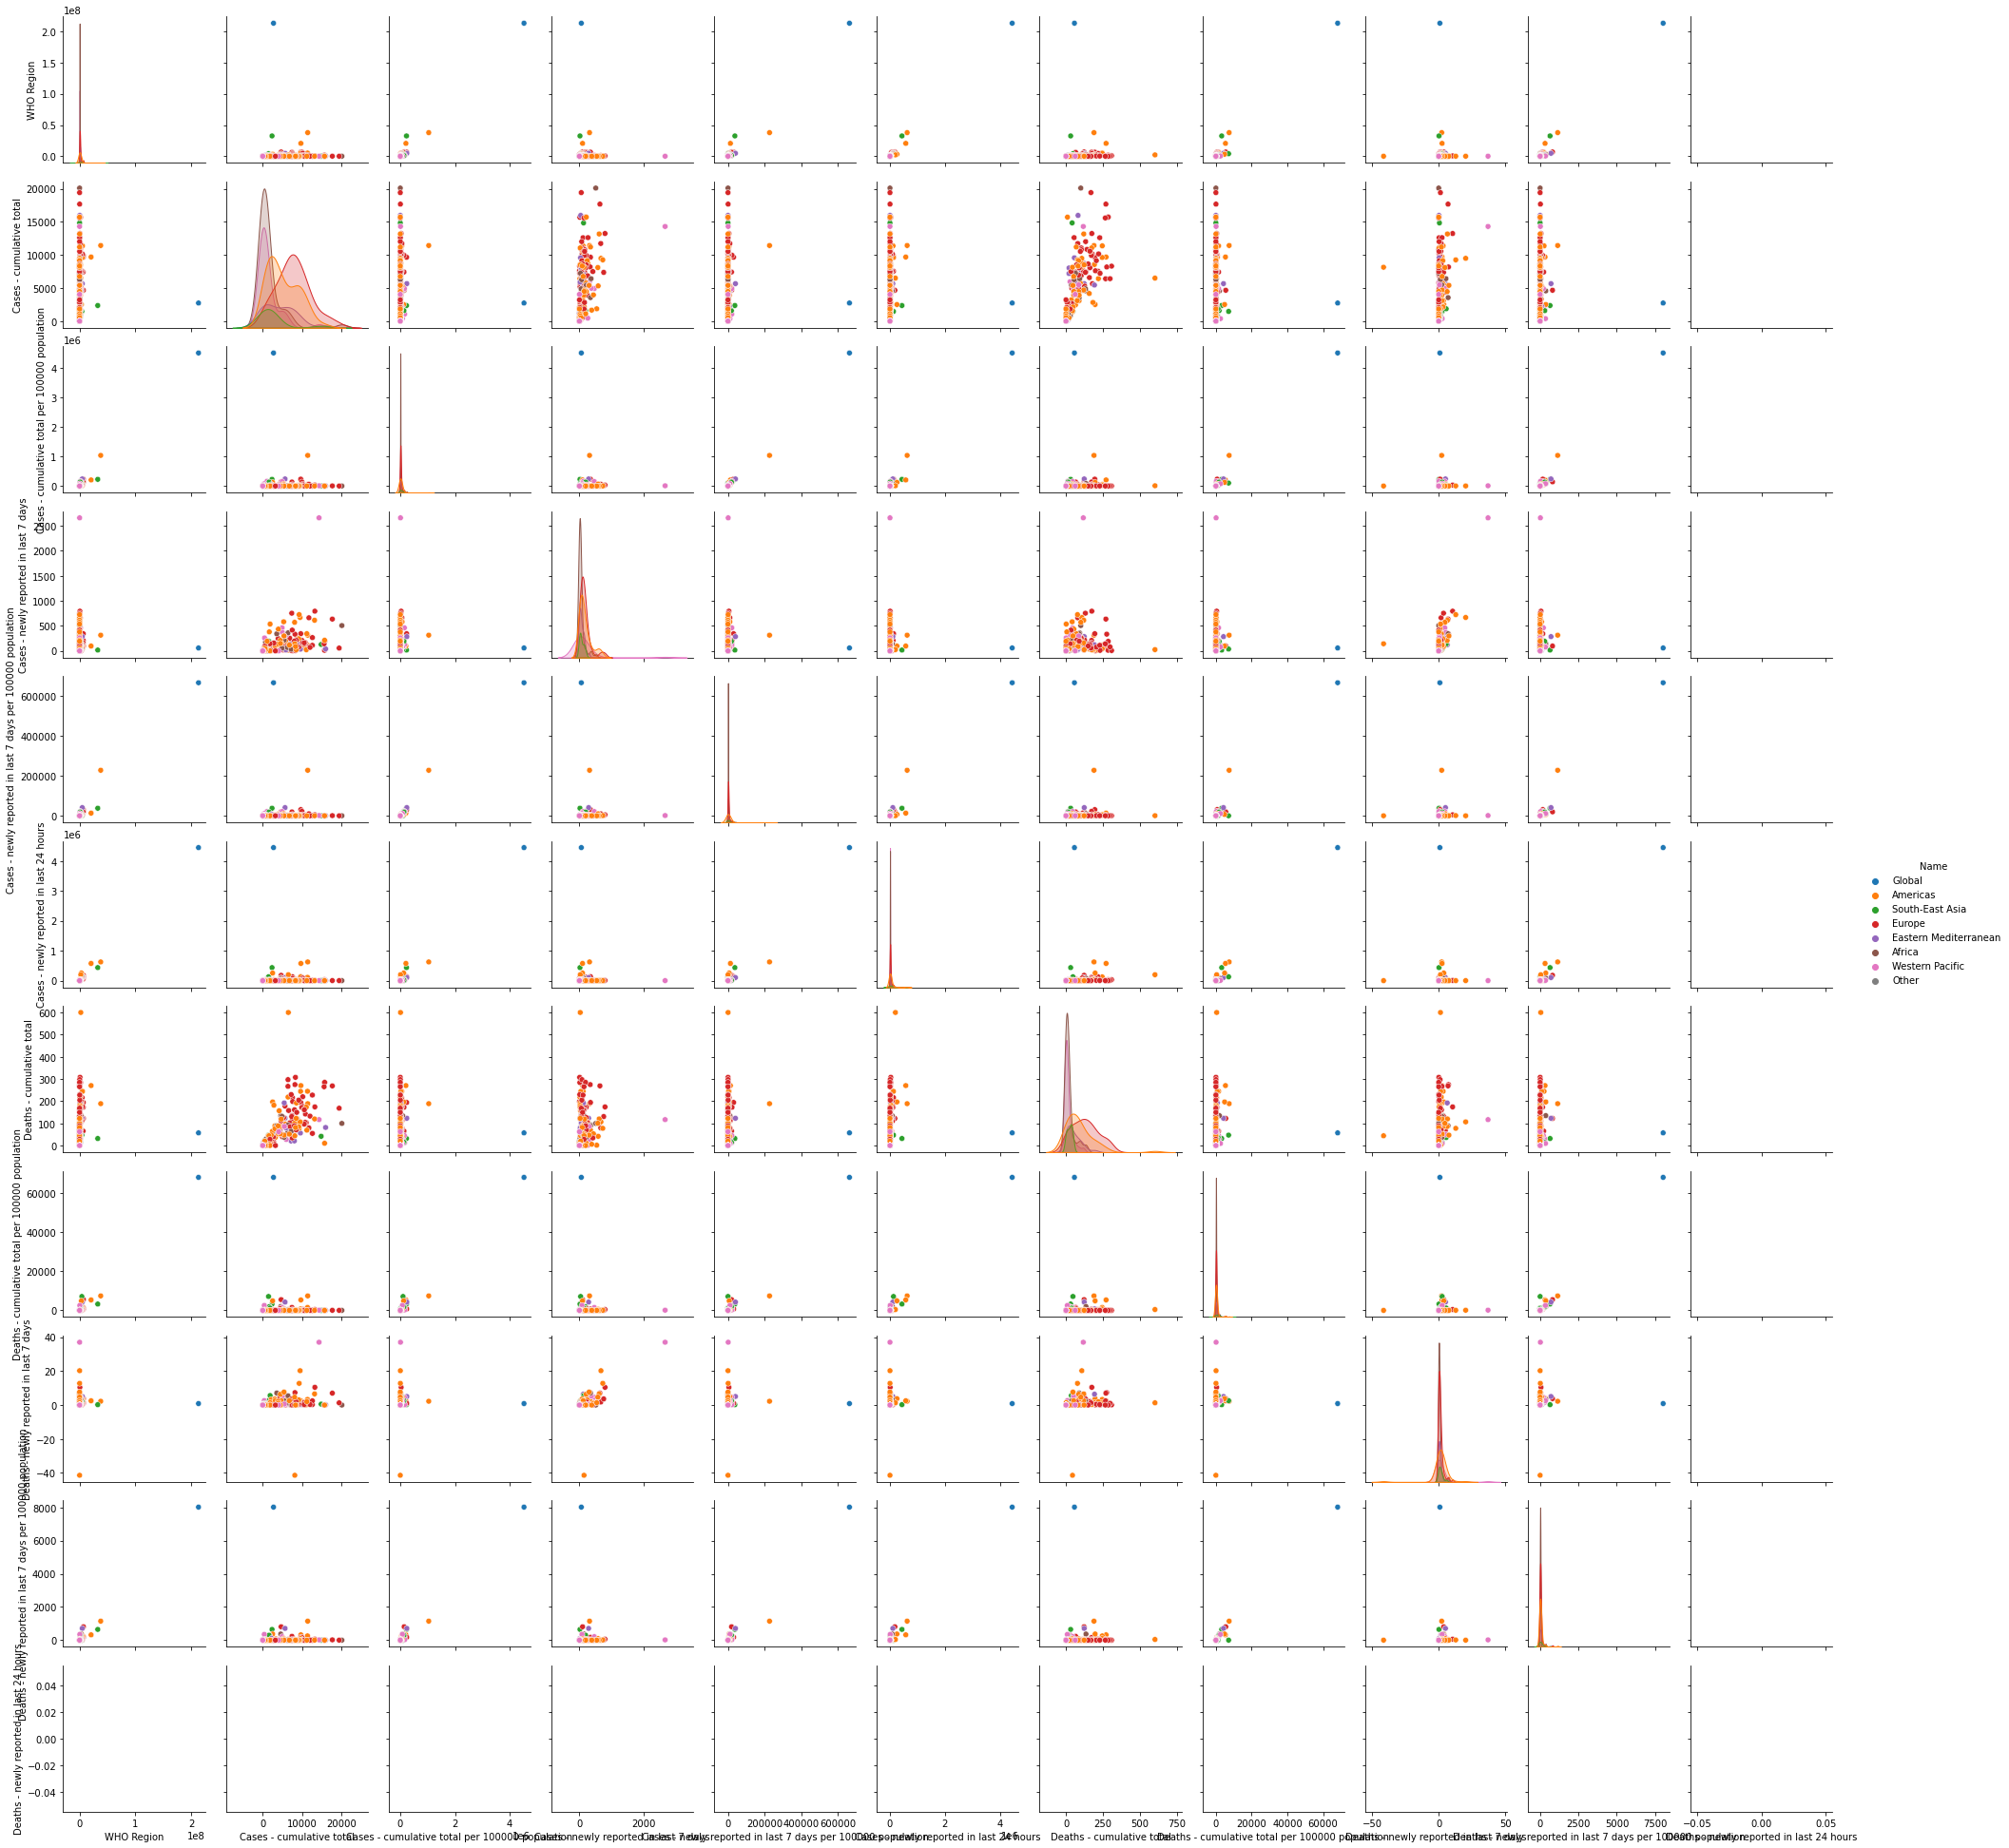

In [86]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='Name');

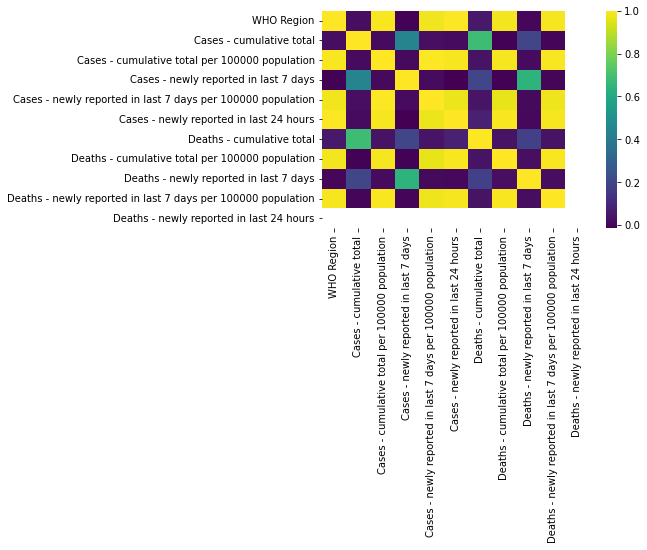

In [87]:
sns.heatmap(df.corr(), cmap='viridis');

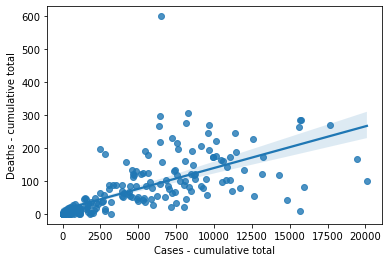

In [88]:
sns.regplot(x=df['Cases - cumulative total'], y=df['Deaths - cumulative total']);

In [89]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [90]:
itr = IterativeImputer(estimator= LinearRegression())
df[['Cases - cumulative total','Deaths - cumulative total']] = itr.fit_transform(df[['Cases - cumulative total','Deaths - cumulative total']])
df[['Cases - newly reported in last 7 days', 'Deaths - newly reported in last 7 days']] = itr.fit_transform(df[['Cases - newly reported in last 7 days', 'Deaths - newly reported in last 7 days']])

In [91]:
df.drop('Deaths - newly reported in last 24 hours', inplace=True, axis=1)

## Testando diferentes algoritmos de ML no dataset

**Sobre a Arvore de decisão:** Boa pra classificação de dados que não são muito grandes e que não tem linearidade. O algoritmo cria um modelo que prediz o valor de uma variável target aprendendo de pequenas regras de decisões inferidas do dataset. Abaixo vem uma imagem auto-explcativa de como isso acontece

![imagem](https://scikit-learn.org/stable/_images/iris.png)

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
df.drop(['Deaths - newly reported in last 24 hours'], axis=1, inplace=True)

In [159]:
pais = pd.get_dummies(df.Name)
df2 = pd.concat([df, pais], axis=1)
df2.reset_index(inplace=True)
df2

,index,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Africa,Americas,Eastern Mediterranean,Europe,Global,Other,South-East Asia,Western Pacific
0,Global,Global,213050725,2733.332758,4517068,57.951692,664610,4448352,57.0701,68150,0.87433,8023,0,0,0,0,1,0,0,0
1,United States of America,Americas,37816239,11424.750000,1038848,313.850000,227282,625046,188.8300,7418,2.24000,1146,0,1,0,0,0,0,0,0
2,India,South-East Asia,32512366,2355.960000,226509,16.410000,37593,435758,31.5800,3239,0.23000,648,0,0,0,0,0,0,1,0
3,Brazil,Americas,20583994,9683.880000,205424,96.640000,13103,574848,270.4400,5356,2.52000,321,0,1,0,0,0,0,0,0
4,Russian Federation,Europe,6804910,4662.990000,141437,96.920000,19536,178423,122.2600,5514,3.78000,809,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,1,0,0,0,0,0,0,0
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,0,0,0,0,0,0,0,1
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,0,0,0,0,0,0,0,1
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.0000,0,0.00000,0,0,0,0,1,0,0,0,0


In [193]:
df2.dropna(inplace=True)

In [194]:
X = df2.drop(['Africa', 'Eastern Mediterranean', 'Europe', 'Global', 'Other', 'South-East Asia', 'Western Pacific', 'index', 'Name'], axis=1)
y = df2.Americas

In [184]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [196]:
clf = DecisionTreeClassifier()

In [197]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
y_pred = clf.predict(X_test)

In [201]:
from sklearn.metrics import confusion_matrix, classification_report

In [200]:
print(confusion_matrix(y_test, y_pred))

[[129   0]
 [  0  37]]


In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        37

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



**Ponto negativo:** Fácil overfitting, ou seja: Muito bom com dados de treino, mas quando colocado com dados reais, não performa bem

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
knn = KNeighborsClassifier(n_neighbors=9)

In [242]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [243]:
y_pred2 = knn.predict(X_test)

In [244]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       129
           1       0.46      0.16      0.24        37

    accuracy                           0.77       166
   macro avg       0.63      0.55      0.55       166
weighted avg       0.72      0.77      0.73       166



In [220]:
erro = []


for x in range(1, 72):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    y_pred2 = knn.predict(X_test)
    erro.append(np.mean(y_pred2 != y_test))

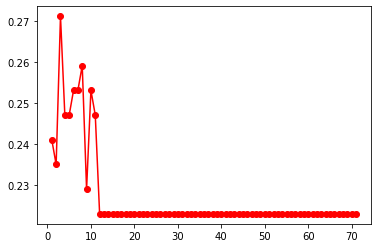

In [222]:
plt.plot(range(1, 72), erro, marker='o', color='red')

### Random Forest

Em termos simples, ele performa múltiplas decision tree de uma vez, e escolhe a melhor fitagem dos dados

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rfc = RandomForestClassifier(criterion='entropy')

In [259]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [260]:
y_pred3 = rfc.predict(X_test)

In [261]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       129
           1       1.00      0.95      0.97        37

    accuracy                           0.99       166
   macro avg       0.99      0.97      0.98       166
weighted avg       0.99      0.99      0.99       166

